# CS 595 Final Project

# Colorization of Black and White Photos using Neural Networks 

## Mayank Reddy Saddi

## CWID: A20423747

In [2]:
#importing necessary libraries

In [7]:
import keras
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from os.path import isfile, join
from keras.callbacks import TensorBoard
from keras import optimizers, regularizers
from keras.regularizers import l2,l1
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.io import imsave
import scipy
from scipy import ndimage, misc
from PIL import Image


Getting Images from directory. This process might take a while please be patient.

In [3]:
def load_images(path):
    X = []
    Y = []
    Z=[]
    for image in os.listdir(path):
        
        if '.jpg' in image:
            #print(path + image)
            train_image = Image.open(path + image)
            #test_img=cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
            train_image = train_image.resize((128, 128))
            train_image=np.asarray(train_image).astype(np.float32)
            train_image = train_image/255.0
            #print(rgb2lab(train_image).shape)
            x_image = rgb2lab(train_image)[:,:,0]
            x_image = np.reshape(x_image,(128,128,1))
            X.append(x_image)
            Y.append((rgb2lab(train_image)[:,:,1:]) / 128)
        '''   
        elif '.JPEG' in image:
            #print(path + image)
            train_image = Image.open(path + image)
            #test_img=cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
            train_image = train_image.resize((128, 128))
            train_image=np.asarray(train_image).astype(np.float32)
            train_image = train_image/255.0
            #print(rgb2lab(train_image).shape)
            x_image = rgb2lab(train_image)[:,:,0]
            x_image = np.reshape(x_image,(128,128,1))
            X.append(x_image)
            Y.append((rgb2lab(train_image)[:,:,1:]) / 128)
        '''
    X=np.asarray(X).astype(np.float32)
    Y=np.asarray(Y).astype(np.float32)
    return X,Y

X,Y=load_images("D:\\Desktop\\IIT\\Sem2\\DL\\Project\\Train_data\\")


X = np.array(X).astype(np.float32)
Y = np.array(Y).astype(np.float32)

X = X.reshape(len(X), 128, 128, 1)
Y = Y.reshape(len(Y), 128, 128, 2)

print(X.shape)
print(Y.shape)
print('*******')


#splitting into training and validation data
split=int(0.75*len(X))

X_train=X[:split]
Y_train=Y[:split]

X_val=X[split:]
Y_val=Y[split:]


(5575, 128, 128, 1)
(5575, 128, 128, 2)
*******


In [10]:
print((X_val.shape))

(1393, 128, 128, 1)


In [4]:
modelx3 = Sequential()
modelx3.add(InputLayer(input_shape=(128, 128, 1)))
modelx3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modelx3.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
modelx3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelx3.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
modelx3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modelx3.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
modelx3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
modelx3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modelx3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelx3.add(UpSampling2D((2, 2)))
modelx3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modelx3.add(UpSampling2D((2, 2)))
modelx3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
modelx3.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
modelx3.add(UpSampling2D((2, 2)))
modelx3.compile(optimizer='rmsprop', loss='mse',metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [ ]:
tensorboard = TensorBoard(log_dir="/output/beta_run")
history=modelx3.fit(x=X_train, y=Y_train, batch_size=10, epochs=500, verbose=1, validation_data=(X_val,Y_val),callbacks=[tensorboard])


#Plotting
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 4181 samples, validate on 1394 samples
Epoch 1/500
4181/4181 [==============================] - 42s 10ms/step - loss: 0.0205 - acc: 0.6067 - val_loss: 0.0168 - val_acc: 0.5645
Epoch 2/500
4181/4181 [==============================] - 39s 9ms/step - loss: 0.0107 - acc: 0.6227 - val_loss: 0.0161 - val_acc: 0.5074
Epoch 3/500
4181/4181 [==============================] - 39s 9ms/step - loss: 0.0102 - acc: 0.6289 - val_loss: 0.0150 - val_acc: 0.5913
Epoch 4/500
4181/4181 [==============================] - 39s 9ms/step - loss: 0.0100 - acc: 0.6326 - val_loss: 0.0189 - val_acc: 0.5879
Epoch 5/500
4181/4181 [==============================] - 39s 9ms/step - loss: 0.0097 - acc: 0.6368 - val_loss: 0.0145 - val_acc: 0.6003
Epoch 6/500
4181/4181 [==============================] - 39s 9ms/step - loss: 0.0096 - acc: 0.6383 - val_loss: 0.0150 - val_acc: 0.5699
Epoch 7/500
4181/4181 [==============================] - 39s 9ms/step - loss: 0.0095 - acc: 0.6416 - val_loss: 0.0144 - val_acc: 0.6352

In [38]:
print("\n\n\nSaving Model....\n\n\n")
modelx3.save("D:\\Desktop\\IIT\\Sem2\\DL\\Project\\final_model.h5")




Saving Model....






Loading saved model



<Figure size 1440x720 with 0 Axes>

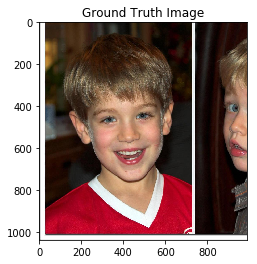

<Figure size 1440x720 with 0 Axes>

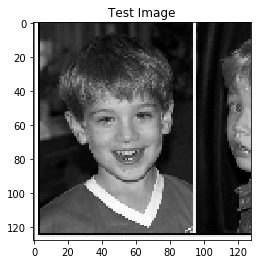

<Figure size 1440x720 with 0 Axes>

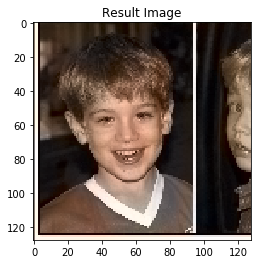

In [39]:
print("\nLoading saved model\n")
model=load_model("D:\\Desktop\\IIT\\Sem2\\DL\\Project\\final_model.h5")
test_img=Image.open("D:\\Desktop\\IIT\\Sem2\\DL\\Project\\Train_data\\3210193974_1.jpg")
test_img1 = test_img.resize((128, 128))
test_img1=np.asarray(test_img1)
test_img1 = test_img1/255.0
xtest_img = rgb2lab(test_img1)[:,:,0]
xtest_img = np.reshape(xtest_img,(1,128,128,1))
ytest_img = rgb2lab(test_img1)[:,:,1:]

output=model.predict(xtest_img)
output=output*128.0
canvas = np.zeros((128, 128, 3))
zcanvas= np.zeros((128, 128, 3))
canvas[:,:,0] = xtest_img[0][:,:,0]
zcanvas[:,:,0] = xtest_img[0][:,:,0]
canvas[:,:,1:] = output
canvas=lab2rgb(canvas)
zcanvas=lab2rgb(zcanvas)
plots=[]
plots.append(test_img)
plots.append(canvas)
import matplotlib.image as mpimg
plt.figure(figsize=(20,10))
plt.figure()
plt.title("Ground Truth Image")
plt.imshow(test_img)

plt.figure(figsize=(20,10))
plt.figure()
plt.title("Test Image")
plt.imshow(zcanvas)

plt.figure(figsize=(20,10))
plt.figure()
plt.title("Result Image")
plt.imshow(canvas)


Loading saved model



<Figure size 1440x720 with 0 Axes>

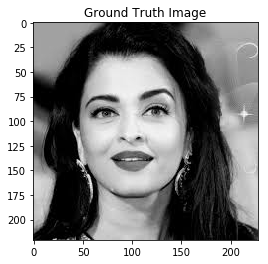

<Figure size 1440x720 with 0 Axes>

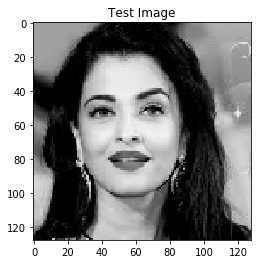

<Figure size 1440x720 with 0 Axes>

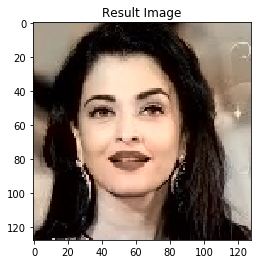

In [5]:
print("\nLoading saved model\n")
model=load_model("D:\\Desktop\\IIT\\Sem2\\DL\\Project\\final_model.h5")
test_img=Image.open("D:\\Desktop\\IIT\\Sem2\\DL\\Project\\test_data\\Allen_Iverson_0002.jpg")
test_img1 = test_img.resize((128, 128))
test_img1=np.asarray(test_img1)
test_img1 = test_img1/255.0
xtest_img = rgb2lab(test_img1)[:,:,0]
xtest_img = np.reshape(xtest_img,(1,128,128,1))
ytest_img = rgb2lab(test_img1)[:,:,1:]

output=model.predict(xtest_img)
output=output*128.0
canvas = np.zeros((128, 128, 3))
zcanvas= np.zeros((128, 128, 3))
canvas[:,:,0] = xtest_img[0][:,:,0]
zcanvas[:,:,0] = xtest_img[0][:,:,0]
canvas[:,:,1:] = output
canvas=lab2rgb(canvas)
zcanvas=lab2rgb(zcanvas)
plots=[]
plots.append(test_img)
plots.append(canvas)
import matplotlib.image as mpimg
plt.figure(figsize=(20,10))
plt.figure()
plt.title("Ground Truth Image")
plt.imshow(test_img)

plt.figure(figsize=(20,10))
plt.figure()
plt.title("Test Image")
plt.imshow(zcanvas)

plt.figure(figsize=(20,10))
plt.figure()
plt.title("Result Image")
plt.imshow(canvas)

<Figure size 9216x9216 with 0 Axes>

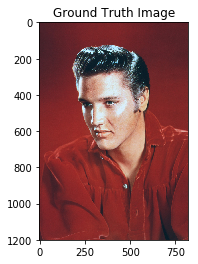

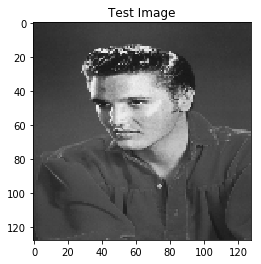

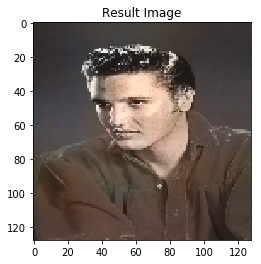

In [46]:
model=load_model("D:\\Desktop\\IIT\\Sem2\\DL\\Project\\final_model.h5")
test_img=Image.open("D:\\Desktop\\IIT\\Sem2\\DL\\Project\\Test_data\\elvis.jpg")
test_img1 = test_img.resize((128, 128))
test_img1=np.asarray(test_img1)
test_img1 = test_img1/255.0
xtest_img = rgb2lab(test_img1)[:,:,0]
xtest_img = np.reshape(xtest_img,(1,128,128,1))
ytest_img = rgb2lab(test_img1)[:,:,1:]

output=model.predict(xtest_img)
output=output*128.0
canvas = np.zeros((128, 128, 3))
zcanvas= np.zeros((128, 128, 3))
canvas[:,:,0] = xtest_img[0][:,:,0]
zcanvas[:,:,0] = xtest_img[0][:,:,0]
canvas[:,:,1:] = output
canvas=lab2rgb(canvas)
zcanvas=lab2rgb(zcanvas)
plots=[]
plots.append(test_img)
plots.append(canvas)
import matplotlib.image as mpimg
plt.figure(figsize=(128,128))
plt.figure()
plt.title("Ground Truth Image")
plt.imshow(test_img)

#plt.figure(figsize=(10,5))
plt.figure()
plt.title("Test Image")
plt.imshow(zcanvas)

#plt.figure(figsize=(10,5))
plt.figure()
plt.title("Result Image")
plt.imshow(canvas)